Im Rahmen dieser Aufgabe werden wir Kanten aus dem Mandrillbild extrahieren und die Folgen der Anwendung eines Gauß-Filters darauf betrachten. Zunächst laden wir dafür das Bild und zeigen es an.

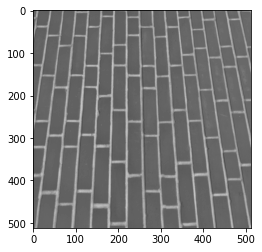

In [13]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import *
import numpy as np
from skimage.data import brick

#img = imread('mandrill.png')
img = brick()

plt.imshow(img, cmap='gray', vmin=0, vmax=255)

Berechnet die Gradientenstärke nach Sobel für jedes Pixel im Bild und visualisiert das Ergebnis. Wie wird dieses aussehen? Versucht einen Grenzwert für die Gradientenstärke so zu finden, dass nur noch für das Gesicht relevante Kanten übrig bleiben. Ist dies möglich?

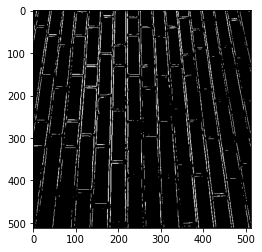

In [14]:
gradientImg = sobel(img)
plt.imshow(gradientImg>.15, cmap='gray', vmin=0, vmax=1)

Wendet nun zunächst einen Gauß-Filter auf das Bild an und berechnet danach die Gradientenstärke nach Sobel. Wie verändert sich das Ergebnis mit steigendem `sigma`? Kann der Grenzwert für die Gradientensträke unverändert bleiben?

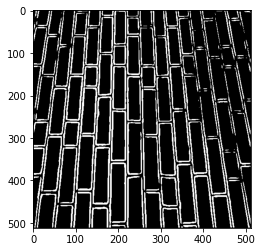

In [15]:
smoothImg = gaussian(img,2)
gradientImg = sobel(smoothImg)
plt.imshow(gradientImg>.05, cmap='gray', vmin=0, vmax=1)

Extrahiert nun die Bildzeile 150 aus dem Bild, dem Bild nach Anwendung des Gauß-Filters mit `sigma=2` und dem Bild nach Anwendung des Gauß-Filters mit `sigma=5`.

Berechnet außerdem den horizontalen Gradienten (vertikale Kanten) auf den drei Bildern und extrahiert aus dem Ergebnis wieder Bildzeile 150.

Plottet nun die beiden Ergebnisse für die drei Bilder jeweils in einen Plot als Funktiongraph. Was ist im Funktiongraphen zu sehen?

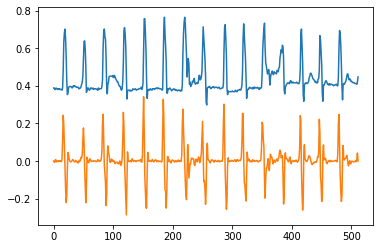

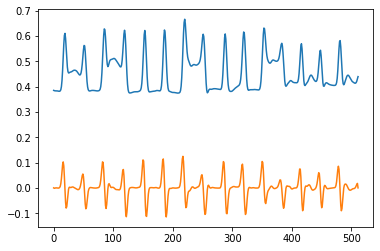

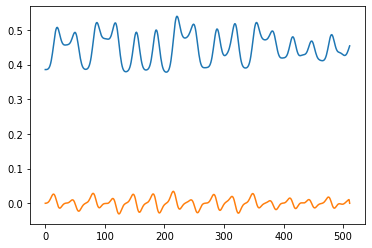

In [16]:
imgRow1 = img[150,:]/255
imgRow2 = gaussian(img, 2)[150,:]
imgRow3 = gaussian(img, 5)[150,:]
imgRow1_1= sobel_v(img)[150,:]
imgRow2_1= sobel_v(gaussian(img, 2))[150,:]
imgRow3_1= sobel_v(gaussian(img, 5))[150,:]

plt.figure(1)
plt.plot(range(len(imgRow1)),imgRow1)
plt.plot(range(len(imgRow1)),imgRow1_1)

plt.figure(2)
plt.plot(range(len(imgRow1)),imgRow2)
plt.plot(range(len(imgRow1)),imgRow2_1)

plt.figure(3)
plt.plot(range(len(imgRow1)),imgRow3)
plt.plot(range(len(imgRow1)),imgRow3_1)

Berechnet nun die Orientierung aller Gradienten für das ursprüngliche Bild. Wie lassen sie sich in einem Histogramm sinnvoll darstellen?

(array([0.00459709, 0.00175724, 0.00498581, 0.0060833 , 0.01552563,
        0.00532112, 0.005023  , 0.00182076, 0.00488605]),
 array([-90., -70., -50., -30., -10.,  10.,  30.,  50.,  70.,  90.]),
 <a list of 9 Patch objects>)

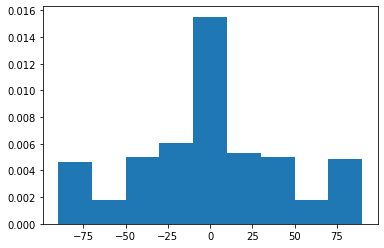

In [17]:
orientations = np.degrees(np.arctan(sobel_h(img)
                                    /(1e-10+sobel_v(img))))

plt.hist(orientations.flatten(), bins =9, range=(-90,90), density=True)

Wie kann man die einzelnen Gradientenorientierungen sinnvoll gewichten, um einen besseren Eindruck über die tatsächlichen Verhältnisse im Bild zu bekommen? Nutzt dazu auch das `brick`-Bild.

(array([0.00377313, 0.00065269, 0.0008408 , 0.00529827, 0.02960693,
        0.0035012 , 0.00086995, 0.00075936, 0.00469766]),
 array([-90., -70., -50., -30., -10.,  10.,  30.,  50.,  70.,  90.]),
 <a list of 9 Patch objects>)

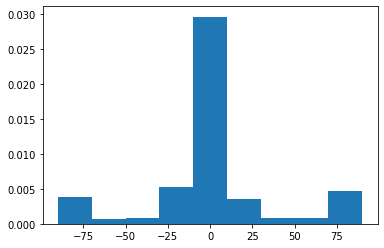

In [18]:
plt.hist(orientations.flatten(), bins =9, range=(-90,90), density=True,
         weights=sobel(img).flatten())         